<a href="https://colab.research.google.com/github/michaeljf00/projects_in_ml_and_ai/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 1: Logistic Regression Implementation**

**Task 1(10 points)**: Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic Regression is the best choice for solving this problem.


One machine learning problem I would like to solve is using a patient's health data to predict if they have cardiovascular disease. The medical field has made progress with faster and more accurate patient diagnoses using machine learning. Using a largescale dateset in general is often difficult to analyze, but the use of AI relieves that issue to an extent.The dataset contains basic info such as age, gender, height and weight. Notably along with that it contains patient information relating to their cardiovascular health (systolic blood pressure, diastolic blood pressure, cholestrol etc.). Using logistic regression for this problem is appropriate since it is parsing the data to solve a yes or no question, which is a binary dependent variable. Along with this, there are a sufficient number of datapoint with each one collected independent of each other at patient examination.

**Task 2(20 points)**: Pick a publicly available dataset that you will use to solve this problem. You must provide a link to the dataset and perform necessary Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a justification of why these were required. For example, if the dataset has lot of missing values, then why did you use a specific technique when handling missing data.



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# DATASET
# Link: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

df = pd.read_csv('drive/MyDrive/cardio_train.csv', sep = ',', header = 0)
df = df.head(1000)
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0


The data does look organized and in a codition to be parsed. Since it is such a large dataset, let's use just the first 1000 records in the dataframe. To confirm the dataset's usablity, let's check if there are any null values.

In [9]:
df.isna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.dropna(inplace=True)

No null values are present which means a more in-depth description of the data can be analyzed but first the id column will be removed since it is irrelevant in the data processing.

In [11]:
new_df = df.drop(["id"], axis=1)
new_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,2,167,64.0,110,70,1,1,0,0,0,0
996,52,1,168,78.0,120,80,1,1,0,0,1,1
997,51,1,149,56.0,140,80,1,1,0,0,1,1
998,48,1,156,74.0,150,90,1,1,0,0,0,1


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1000 non-null   int64  
 1   gender       1000 non-null   int64  
 2   height       1000 non-null   int64  
 3   weight       1000 non-null   float64
 4   ap_hi        1000 non-null   int64  
 5   ap_lo        1000 non-null   int64  
 6   cholesterol  1000 non-null   int64  
 7   gluc         1000 non-null   int64  
 8   smoke        1000 non-null   int64  
 9   alco         1000 non-null   int64  
 10  active       1000 non-null   int64  
 11  cardio       1000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 101.6 KB


In [13]:
new_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,53.262000,1.359000,164.102000,74.734300,127.463000,92.655000,1.393000,1.241000,0.095000,0.04600,0.778000,0.507000
std,6.902536,0.479947,8.363704,15.259966,18.106918,102.072635,0.697881,0.589293,0.293362,0.20959,0.415799,0.500201
min,39.000000,1.000000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000
50%,54.000000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,65.000000,2.000000,188.000000,200.000000,200.000000,1100.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000


This graph was created to show the spread of the colletected patient ages. The distribution looks to be even and the ages are not skewed to one end.

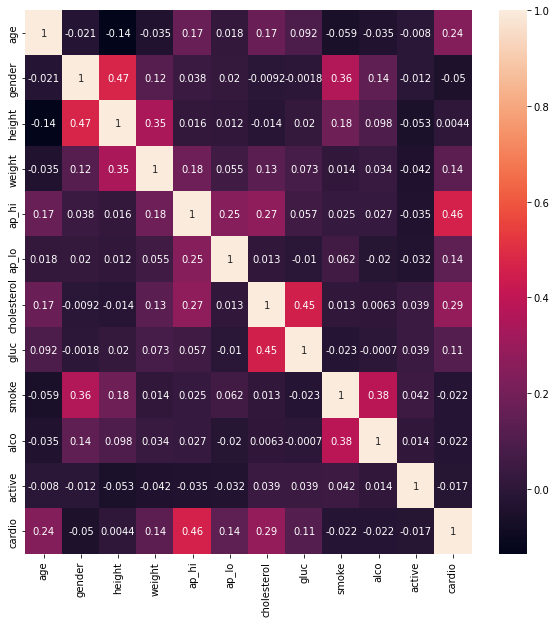

In [15]:
corr = new_df.corr()
sns.heatmap(corr, annot=True, ax=plot.subplots(figsize=(10,10))[1])
plot.show()

**Examination**
A hashmap was created to find the correlation between certain features. Two correlations stands out, one being the relationship between glucose and cholseterol which is at 0.45 and ap_hi (systolic blood pressure) with cardio with the value being 0.46. The relationship between weight and cholesterol is notable as well. Other factors that have an acknowledgable positive correlation with the disease directly are cholesterol, weight and age.

**Analysis**

The data seems to be collected properly and organized in a proper manner. The one column I cleaned up was the age column as it was represented in days, which I foresaw creating issues in further calculations/analyses. The mean and standard deviation values shows that there is an even spread of data points. It is an even collection with a balanced selection of ages, most being middle-aged with the average at 53. The amount of data points is more than sufficient with 70000 samples collected and 1000 being processed. Overall, this is a valid source that is usable.

**Task 3(35 points)**: Implement, Logistic Regression in this step. Clearly write your cost function and derivatives before implementing gradient descent. Do not use any built-in packages for this step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants of gradient descent in their original form. (Refer to the research paper discussed in class).


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)

In [17]:
def sigmoid(X):
  return 1 / (1+np.exp(-X))

# derivatives
# A = sigmoid(np.dot(X, W) + B)
# return np.dot(X.T, (A-Y)/n), np.sum(A-Y)/n

def prediction(X, W, B):
  predictions = sigmoid(np.dot(X, W) + B)
  return [1 if p > 0.5 else 0 for p in predictions]

# cost
def getLoss(X, Y, W, B):
  A = sigmoid(np.dot(X, W) + B)
  return -np.mean(Y * np.log(A) - (1-Y) * (np.log(1-A)))

def model(X, Y, gd_type, size=None, epochs=1000, learningRate=0.0001):
  s = X.shape
  w = np.random.rand(s[1], 1) # weight
  b = np.random.randint(-1, 2)
  Y = Y.reshape(s[0], 1)

  losses = list()

  if gd_type == "gd": # Gradient Descent
    for _ in range(epochs):

      A = sigmoid(np.dot(X, w) + b)
      
      w = w - learningRate * (np.dot(X.T, (A-Y))/s[1])
      b = b - learningRate * (np.sum(A-Y)/s[1])

      losses.append(getLoss(X, Y, w, b))
    
  elif gd_type == "mbgd": # Mini Batch Gradient Desecent
    for _ in range(epochs):
      for index in range((s[0]-1)//size + 1):
          first, last= index * size, (index * size) + size
          xb, yb = X[first:last], Y[first:last]

          A = sigmoid(np.dot(xb, w) + b)
          w -= learningRate*(np.dot(xb.T, (A-yb))/s[1])
          b -= learningRate*(np.sum(A-yb)/s[1])
        
      losses.append(getLoss(X, Y, w, b))


  return w, b, losses

In [18]:
df_copy = new_df.copy()
X = df_copy.to_numpy()
Y = df_copy.pop("cardio").values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, test_size = 0.1)

In [43]:
# Gradient Descent
w, b, losses = model(X_train, Y_train, "gd")
predictions = prediction(X_test, w, b)
print(np.sum(Y_test == predictions)/len(Y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


0.62


In [42]:
# Mini Batch Gradient Descent
w, b, losses = model(X_train, Y_train, "mbgd", 100)
predictions = prediction(X_test, w, b)
print(np.sum(Y_test == predictions)/len(Y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


0.55


**Task 4(35 points)**: Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’ gradient descent. Implement both. You may implement these algorithms yourself OR use a package. In your conclusion, compare both optimization techniques/algorithms with respect to the results you achieve. Also compare these results with the original implementation of gradient descent (Task 3 above). Describe why or why not should we use optimization algorithms for the task at hand.


In [36]:
# Mini Batch with Adagrad
def adagradModel(X, Y, epochs, size=100, learningRate=0.0001):
  s = X.shape
  w = np.random.rand(s[1], 1) # weight
  b = np.random.randint(-1, 2)
  Y = Y.reshape(s[0], 1)
  extra = 1e-8

  prev_w, prev_b = -float("infinity"), -float("infinity")
  losses = list()
    
  for _ in range(epochs):
    for index in range((s[0]-1)//size + 1):
        first, last= index * size, (index * size) + size
        xb, yb = X[first:last], Y[first:last]

        A = sigmoid(np.dot(xb, w) + b)

        curr_w = np.dot(xb.T, (A-yb))/s[1]
        curr_b = np.sum(A-yb)/s[1]

        prev_w += curr_w**2
        prev_b += curr_b**2
        var = extra + prev_b
        w -= (learningRate/np.sqrt(extra)) * prev_w
        b -= (learningRate/np.sqrt(extra)) * prev_b
      
    losses.append(getLoss(X, Y, w, b))


  return w, b, losses

In [37]:
# Mini Batch with Momentum
def momentumModel(X, Y, epochs, size=100, learningRate=0.0001, m=0.9):
  s = X.shape
  w = np.random.rand(s[1], 1) # weight
  b = np.random.randint(-1, 2)
  Y = Y.reshape(s[0], 1)

  
  prev_w, prev_b = -float("infinity"), -float("infinity")
  losses = list()
    
  for _ in range(epochs):
    for index in range((s[0]-1)//size + 1):
        first, last= index * size, (index * size) + size
        xb, yb = X[first:last], Y[first:last]

        A = sigmoid(np.dot(xb, w) + b)
        prev_w -= (m * prev_w) + (learningRate*(np.dot(xb.T, (A-yb))/s[1]))
        prev_b -= (m * prev_b) + (learningRate*(np.sum(A-yb)/s[1]))
        w -= prev_w
        b -= prev_b
      
    losses.append(getLoss(X, Y, w, b))

  return w, b, losses


In [45]:
# Mini Batch with Adagrad
w, b, losses = adagradModel(X_train, Y_train, 1000)
predictions = prediction(X_test, w, b)
print(np.sum(Y_test == predictions)/len(Y_test))

0.5


In [44]:
# Mini Batch with Momentum
w, b, losses = momentumModel(X_train, Y_train, 1000)
predictions = prediction(X_test, w, b)
print(np.sum(Y_test == predictions)/len(Y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


0.5


**Analysis**
The two optimization algorithms chosen to improve the regular gradient descent algorithm are 'Mini Batch with Adagrad and Mini Batch with Momentum'. The optimized versions scored a lower accuracy but always stay consistent, never varying in its value. With that said, I do not believe the optimized versions worked in this case because they scored significantly lower, but I do trust them produce a more consistent outcome if tested repeatedly.